<a href="https://colab.research.google.com/github/Tavares2020/Tavares2020/blob/main/02_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FICO Analytic Challenge © Fair Isaac 2025**
## Week 2: Data Analysis

In this Notebook, we will cover the following in an explaratory data analysis approach:
- Missing Values

- Distributions of Values

- Visulization

Note: Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. We will be using this library a lot throughout this week. If you are not familiar with this library, please check out [this tutorial.](https://www.geeksforgeeks.org/matplotlib-tutorial/)

In [ ]:
import os
import sys
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive/', force_remount=True)

# Base path for your project
path = '/content/drive/MyDrive/FICO Analytic Challenge/'

# Folder that's holding dataset
data = 'Data'

# Model Folder's name
modelFolder='Model'

# Path to the "Data" folder
data_path = os.path.join(path, data)

# Subdirectories to include in sys.path
subdirectories = [data, 'DNU_Functions', modelFolder] + [f'Week_{str(i).zfill(2)}' for i in range(12)]

# Add each subdirectory to sys.path
for subdir in subdirectories:
    sys.path.append(os.path.join(path, subdir))

# Change working directory to the base path
os.chdir(path)
print(os.getcwd())

Mounted at /content/drive/
/content/drive/MyDrive/FICO Analytic Challenge


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from fico_functions import *
from IPython.display import display, Math, Latex, Image

# Plotting library
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import warnings
warnings.filterwarnings('ignore')

# Removing limitation in viewing pandas columns and rows
pd.set_option('display.max_columns', None, 'display.max_rows', None)

### Loading the dataset

In [ ]:
# dataset file prefix
trainFile = ['train']
testFile = ['test_A']

# Set to "True" if importing base dataset; default is False
base=True

# Set to "True" if creating advanced features; default is False
creatingAdvancedFeatures=False

# Set to "True" if using advanced features, "False" if using regular features and not base; default is False
usingAdvancedFeatures=False

# CSV filename and where outputs will be saved
trainCSV, trainsaveCSV, _ = featuresFileSuffix(data_path, trainFile, creatingAdvancedFeatures, usingAdvancedFeatures, base=base)
testCSV, testsaveCSV, _ = featuresFileSuffix(data_path, testFile, creatingAdvancedFeatures, usingAdvancedFeatures, base=base)

Only in Week 4
Using train.csv as input. Creating Features and saving all features to train_features.csv
File 1: /content/drive/MyDrive/FICO Analytic Challenge/Data/train.csv
File 2: /content/drive/MyDrive/FICO Analytic Challenge/Data/train_features.csv

Only in Week 4
Using test_A.csv as input. Creating Features and saving all features to test_A_features.csv
File 1: /content/drive/MyDrive/FICO Analytic Challenge/Data/test_A.csv
File 2: /content/drive/MyDrive/FICO Analytic Challenge/Data/test_A_features.csv



In [ ]:
#Upload pre-processed data
df1 = import_df(trainCSV)
df2 = import_df(testCSV)

In [ ]:
# Concatenate the DataFrames
df = pd.concat([df1, df2])

**df.columns** provides a way to access and view the names of all the columns in the DataFrame. This is useful for understanding the structure of the DataFrame or when performing operations that depend on knowing the column names. Refer to the Data Specification for more information about each column.

In [ ]:
df.columns

Index(['pan', 'merchant', 'category', 'transactionAmount', 'first', 'last',
       'gender', 'street', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob',
       'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'mdlIsFraudTrx',
       'mdlIsFraudAcct', 'transactionDateTime', 'is_train', 'merchCountry',
       'merchState', 'cardholderCountry', 'cardholderState'],
      dtype='object')

The **head()** function in pandas is used to display the first few rows of a DataFrame. By default, it shows the first five rows, but you can specify the number of rows you want to view by passing an integer as an argument.

In [ ]:
# display top 5 rows to verify that the dataset has loaded correctly
df.head(5)

,pan,merchant,category,transactionAmount,first,last,gender,street,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,mdlIsFraudTrx,mdlIsFraudAcct,transactionDateTime,is_train,merchCountry,merchState,cardholderCountry,cardholderState
179572,T001028354037962B,Zboncak LLC,grocery_pos,1338.57,Melody,Thompson,F,0362 Anderson Wall,64470,40.1362,-95.2138,1631,Architect,1953-01-20,6f65ed65d3f36366420fc82e4f0a499a,1345224472,40.199545,-95.393991,1,1,2020-09-17 15:27:52,1,US,Missouri,US,Missouri
179573,T001028354037962B,Zboncak LLC,shopping_pos,1189.84,Melody,Thompson,F,0362 Anderson Wall,64470,40.1362,-95.2138,1631,Architect,1953-01-20,6f65ed65d3f36366420fc82e4f0a499a,1345224472,40.199545,-95.393991,1,1,2020-09-17 15:41:52,1,US,Missouri,US,Missouri
179574,T001028354037962B,Zboncak LLC,misc_pos,743.65,Melody,Thompson,F,0362 Anderson Wall,64470,40.1362,-95.2138,1631,Architect,1953-01-20,6f65ed65d3f36366420fc82e4f0a499a,1345224472,40.199545,-95.393991,1,1,2020-09-17 15:55:52,1,US,Missouri,US,Missouri
179575,T001028354037962B,Zboncak LLC,grocery_pos,1338.57,Melody,Thompson,F,0362 Anderson Wall,64470,40.1362,-95.2138,1631,Architect,1953-01-20,6f65ed65d3f36366420fc82e4f0a499a,1345224472,40.199545,-95.393991,1,1,2020-09-17 16:09:52,1,US,Missouri,US,Missouri
179576,T001028354037962B,Zboncak LLC,food_dining,1189.84,Melody,Thompson,F,0362 Anderson Wall,64470,40.1362,-95.2138,1631,Architect,1953-01-20,6f65ed65d3f36366420fc82e4f0a499a,1345224472,40.199545,-95.393991,1,1,2020-09-17 16:23:52,1,US,Missouri,US,Missouri


We need to convert the values in the datetime column of a pandas DataFrame to datetime objects. This is useful when you need to perform date and time operations, such as filtering, aggregating, or extracting specific date components (e.g., year, month, day, hour). This is what we do to tell pandas that the values in this column are DateTime values. The benefits of this conversion are:
* Date and Time Manipulation: Datetime objects allow for easy manipulation of dates and times.
* Filtering: Enables filtering based on specific time periods.
* Time Series Analysis: Essential for time series data analysis.
* Extracting Date Components: Easily extract components like year, month, day, etc.

In [ ]:
type(df['transactionDateTime'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
# parse the datetime feature to datetime arguments
df['transactionDateTime'] = pd.to_datetime(df['transactionDateTime'])

After concatenating two DataFrames in pandas, you might want to use *df.reset_index(drop=True, inplace=True)* to ensure that the index of the resulting DataFrame is properly ordered and doesn't contain duplicate or non-sequential values.

In [ ]:
# reset the index
df.reset_index(drop=True, inplace=True)

Let's look at the first 5 rows again:

In [ ]:
# show top 5 entries to make sure proper dataset loading
df.head(5)

,pan,merchant,category,transactionAmount,first,last,gender,street,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,mdlIsFraudTrx,mdlIsFraudAcct,transactionDateTime,is_train,merchCountry,merchState,cardholderCountry,cardholderState
0,T001028354037962B,Zboncak LLC,grocery_pos,1338.57,Melody,Thompson,F,0362 Anderson Wall,64470,40.1362,-95.2138,1631,Architect,1953-01-20,6f65ed65d3f36366420fc82e4f0a499a,1345224472,40.199545,-95.393991,1,1,2020-09-17 15:27:52,1,US,Missouri,US,Missouri
1,T001028354037962B,Zboncak LLC,shopping_pos,1189.84,Melody,Thompson,F,0362 Anderson Wall,64470,40.1362,-95.2138,1631,Architect,1953-01-20,6f65ed65d3f36366420fc82e4f0a499a,1345224472,40.199545,-95.393991,1,1,2020-09-17 15:41:52,1,US,Missouri,US,Missouri
2,T001028354037962B,Zboncak LLC,misc_pos,743.65,Melody,Thompson,F,0362 Anderson Wall,64470,40.1362,-95.2138,1631,Architect,1953-01-20,6f65ed65d3f36366420fc82e4f0a499a,1345224472,40.199545,-95.393991,1,1,2020-09-17 15:55:52,1,US,Missouri,US,Missouri
3,T001028354037962B,Zboncak LLC,grocery_pos,1338.57,Melody,Thompson,F,0362 Anderson Wall,64470,40.1362,-95.2138,1631,Architect,1953-01-20,6f65ed65d3f36366420fc82e4f0a499a,1345224472,40.199545,-95.393991,1,1,2020-09-17 16:09:52,1,US,Missouri,US,Missouri
4,T001028354037962B,Zboncak LLC,food_dining,1189.84,Melody,Thompson,F,0362 Anderson Wall,64470,40.1362,-95.2138,1631,Architect,1953-01-20,6f65ed65d3f36366420fc82e4f0a499a,1345224472,40.199545,-95.393991,1,1,2020-09-17 16:23:52,1,US,Missouri,US,Missouri


The **info()** function in pandas provides a concise summary of a DataFrame. It is useful for quickly understanding the structure and contents of your DataFrame. Here is what df.info() displays:

* Class Type: The type of the object
* RangeIndex: The range of the DataFrame's index.
* Columns: A list of all column names.
* Non-Null Count: The number of non-null (non-missing) entries in each column.
* Dtype: The data type of each column (e.g., int64, float64, object).
* Memory Usage: The memory usage of the DataFrame.

In [ ]:
# check the data type of each feature present in our dataset
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1611480 entries, 0 to 1611479
Data columns (total 26 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   pan                  1611480 non-null  object        
 1   merchant             1611480 non-null  object        
 2   category             1611480 non-null  object        
 3   transactionAmount    1611480 non-null  float64       
 4   first                1611480 non-null  object        
 5   last                 1611480 non-null  object        
 6   gender               1611480 non-null  object        
 7   street               1611480 non-null  object        
 8   zip                  1611480 non-null  int64         
 9   lat                  1611480 non-null  float64       
 10  long                 1611480 non-null  float64       
 11  city_pop             1611480 non-null  int64         
 12  job                  1611480 non-null  object        
 1

None

## Missing values
Missing values are important and should be analyzed because:
 - They can indicate errors or inconsistencies in the data collection process. By identifying and addressing missing values, we can ensure the integrity and reliability of your dataset.
 - They can distort statistical analyses and machine learning models and introduce bias and error in our analysis.

the **isnull()** function in Pandas is used to detect missing values.

In [ ]:
df.isnull().sum()

,0
pan,0
merchant,0
category,0
transactionAmount,0
first,0
last,0
gender,0
street,0
zip,0
lat,0


sometimes columns are not empty but populated with space characters. In that case, they will not show up as **null** in **isnull()** function, so let's check for space characters in our dataset.

In [ ]:
# function to check each element in a column for being a space character or an empty string.
def has_space_or_empty(column):
    return column.apply(lambda x: isinstance(x, str) and (x.isspace() or x == ''))

# apply the function to object columns only
space_character_columns = df.apply(has_space_or_empty)

# identify columns with any space characters or empty strings
columns_with_space = space_character_columns.any()
print("Columns with space characters or empty strings:")
print(columns_with_space)

Columns with space characters or empty strings:
pan                    False
merchant               False
category               False
transactionAmount      False
first                  False
last                   False
gender                 False
street                 False
zip                    False
lat                    False
long                   False
city_pop               False
job                    False
dob                    False
trans_num              False
unix_time              False
merch_lat              False
merch_long             False
mdlIsFraudTrx          False
mdlIsFraudAcct         False
transactionDateTime    False
is_train               False
merchCountry           False
merchState             False
cardholderCountry      False
cardholderState        False
dtype: bool


If space characters exist, we can get rid of them using below command.

In [ ]:
# df.replace(r'^\s*$', np.nan, regex=True, inplace=True)
# print("Missing values after handling space characters:")
# print(df.isnull().sum())

There are several ways we can handle misssing values:
 - Dropping: If the number of missing values in a row is relatively small compared to the total dataset and dropping those rows does not significantly reduce the dataset's representativeness, you can choose to drop the rows containing missing values. There are many things to consider before droping a row or column of data. For example, we should not drop significant amount of data, data related to important features, and when there are patterns in the missing data.

 - Imputation: There are many ways you can impute a missing value. For example, you can replace missing values with the mean, median, or mode of the column. A more scientific approach would be to use statistical models to predict missing values based on other variables.

 - Forward/Backward fill: For ordered data you can choose to fill missing values with the last known value (forward fill) or the next known value (backward fill).

 - Deduction: You can sometimes deduce a missing value based on other fields. For example, you could find cardholderCountry from currencyCode if it was provided.

The **unique()** function in pandas is used to find and return the unique values from a specific column or Series in a DataFrame. This is useful for identifying the distinct values in a dataset, which helps in understanding the data better and preparing it for analysis.

In [ ]:
unique_values = df.apply(pd.unique)
print("Unique values for each column:")
display(unique_values) # for all columns

# # to view unique values for a specific column:
display(unique_values['category'])

Unique values for each column:


,0
pan,"[T001028354037962B, T0011465039817B, T00267909..."
merchant,"[Zboncak LLC, Lynch-Wisozk, Carroll PLC, Kihn-..."
category,"[grocery_pos, shopping_pos, misc_pos, food_din..."
transactionAmount,"[1338.57, 1189.84, 743.65, 594.92, 1041.11, 89..."
first,"[Melody, Lisa, John, Curtis, Kevin, Danielle, ..."
last,"[Thompson, Garcia, Peters, Young, Summers, Hay..."
gender,"[F, M]"
street,"[0362 Anderson Wall, 213 Gill Expressway, 555 ..."
zip,"[64470, 12037, 39113, 14733, 68723, 72059, 350..."
lat,"[40.1362, 42.3496, 32.9013, 42.1239, 42.277, 3..."


array(['grocery_pos', 'shopping_pos', 'misc_pos', 'food_dining', 'home',
       'entertainment', 'shopping_net', 'grocery_net', 'kids_pets',
       'health_fitness', 'gas_transport', 'personal_care', 'travel',
       'misc_net'], dtype=object)

## Histograms, Distributions, and Visualizations
It is useful to look at distributions and histograms of data as they provide valuable insights into the characteristics of a dataset, making them essential tools in exploratory data analysis. Here's why examining histograms and distributions is useful:

- Understanding Data Structure: Histograms visually represent the distribution of values in a dataset by grouping them into bins. By examining the shape, central tendency, and spread of the histogram, you can gain a better understanding of structure of the data.

- Identifying Patterns and Trends: Histograms help identify patterns, trends, and anomalies in the data. For example, a unimodal distribution indicates a single peak, while a bimodal distribution suggests two distinct peaks. Deviations from expected patterns may reveal interesting insights or potential data issues.

- Assessing Skewness and Kurtosis: Skewness and kurtosis are measures of asymmetry and peakedness in the distribution, respectively. Histograms allow you to visually assess these characteristics, which can inform decisions about data transformation or modeling assumptions.

- Detecting Outliers: Outliers are data points that deviate significantly from the rest of the dataset. Histograms make it easy to identify potential outliers as they appear as data points located far from the main distribution or peaks.

### Mean and Standard Deviation
The mean and standard deviation help describe data. Mean shows the average value of the data and standard deviation measures how spread out the data is around the mean, showing the variability. These two measures are essential for data preprocessing steps like standardization, which adjusts features to have a mean of zero and a standard deviation of one (more on this in future notebooks).

The **describe()** function in Pandas outputs descriptive statistics that summarize the central tendency, dispersion, and shape of a dataframe's distribution of numerical data.

Key Features of describe():
* Count: The number of non-null entries.
* Mean: The average value.
* Standard Deviation (std): The spread of the values.
* Min: The minimum value.
* 25% (1st Quartile): The value below which 25% of the data falls.
* 50% (Median): The middle value of the dataset.
* 75% (3rd Quartile): The value below which 75% of the data falls.
* Max: The maximum value.

In [ ]:
# Fundamental Statistics:
# For our dataset, it only makes sense to look at the descriptive statistics for the transactionAmount column
df['transactionAmount'].describe().T
df.describe().T

,count,mean,min,25%,50%,75%,max,std
transactionAmount,1611480.0,84.957271,1.0,9.86,48.62,86.46,125280.68,270.678235
zip,1611480.0,49257.202621,1330.0,26237.0,49440.0,72165.0,99783.0,27239.472415
lat,1611480.0,39.077477,20.0271,34.8838,39.8882,42.8035,65.6899,5.664468
long,1611480.0,-90.715605,-165.6723,-97.2607,-87.8286,-80.0652,-67.9503,14.492341
city_pop,1611480.0,111348.441126,23.0,760.0,2523.0,22930.0,2906700.0,372330.223772
unix_time,1611480.0,1358475532.55901,1325376018.0,1342890955.0,1356820530.0,1374360354.0,1388534374.0,18180855.325905
merch_lat,1611480.0,39.077198,19.027422,34.999826,39.819647,42.806089,66.682905,5.694963
merch_long,1611480.0,-90.714785,-166.671575,-97.408249,-87.782573,-80.08924,-66.95654,14.505232
mdlIsFraudTrx,1611480.0,0.005895,0.0,0.0,0.0,0.0,1.0,0.07655
mdlIsFraudAcct,1611480.0,0.492713,0.0,0.0,0.0,1.0,1.0,0.499947


Let's use visualization techniques to take a closer look at the TransactionDateTime column. Our goal is to extract the hour of the day from the TransactionDateTime and use histograms to display its distribution.

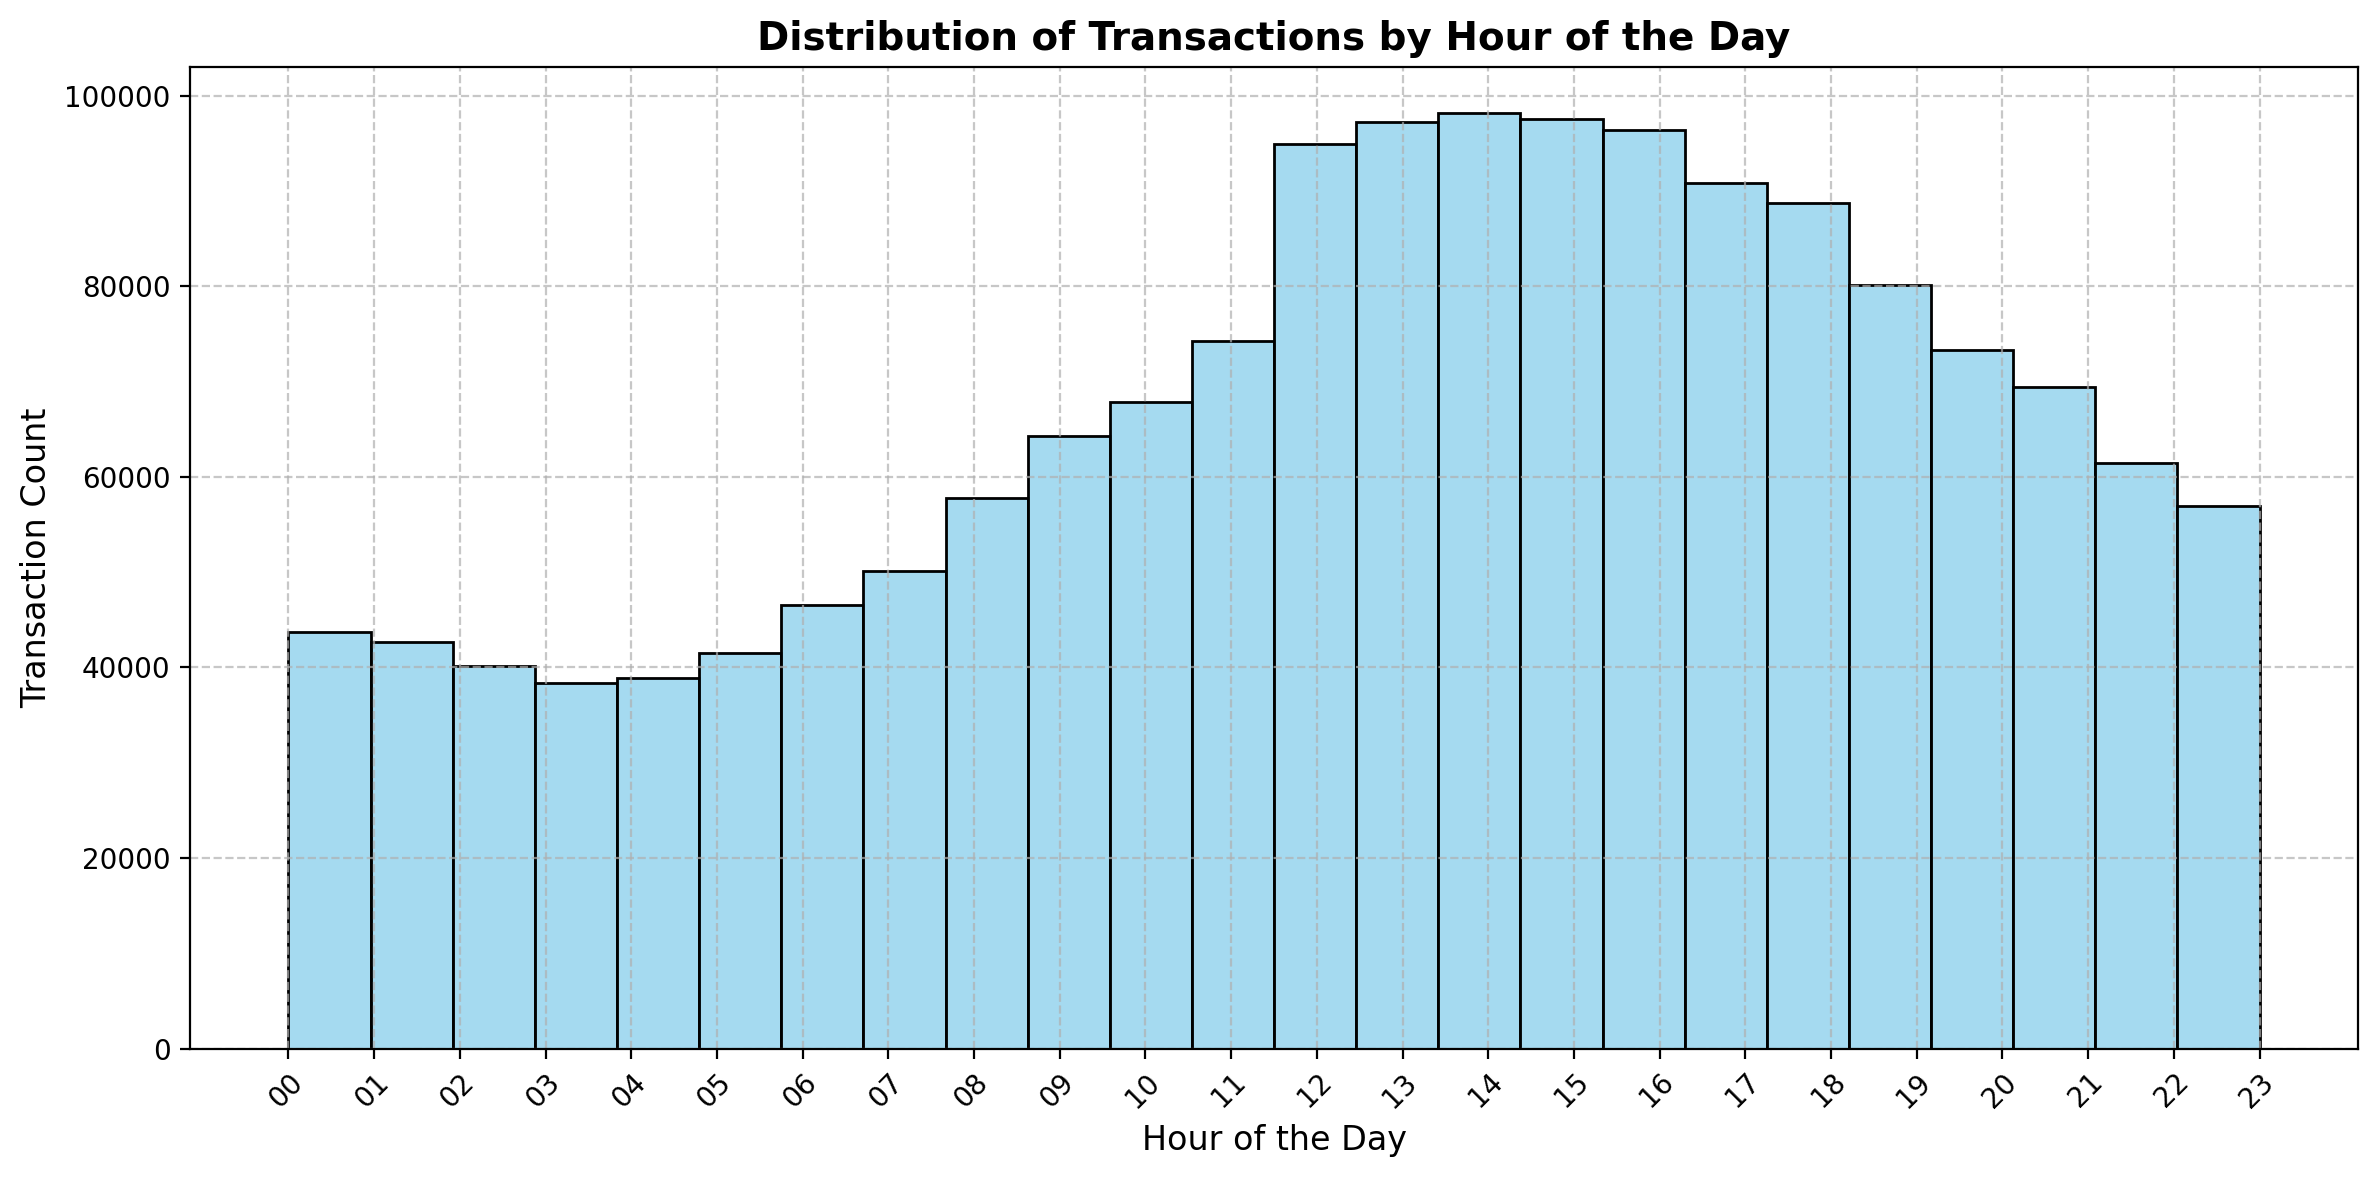

In [ ]:
# Create a new column for the hour extracted from the transactionDateTime
df['hour'] = df['transactionDateTime'].dt.hour  # Extract hour directly

# Plot the histogram
plt.figure(figsize=(12, 6))
sns.histplot(df['hour'], bins=24, edgecolor='black', color='skyblue')  # Enhanced histogram with Seaborn
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Transaction Count', fontsize=12)
plt.title('Distribution of Transactions by Hour of the Day', fontsize=14, weight='bold')

# Customize x-axis labels
hours = np.arange(24)
plt.xticks(hours, [f'{hour:02}' for hour in hours], rotation=45, ha='right', rotation_mode='anchor')  # Format hours as '00', '01', ..., '23'

# Add gridlines for better readability
plt.grid(visible=True, linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()
plt.show()

Our ultimate goal in this project is to detect fraudulent transactions. To achieve this, we need to identify columns that can help us distinguish between fraud and non-fraud transactions, focusing on those with different distributions for each. From now on, we will analyze all measures, such as histograms and distributions, with this perspective. We will evaluate data for both fraudulent and non-fraudulent transactions to gain insights into how our dataset's columns/features correlate with these categories.

Let's create two DataFrames to separate frauds and non-frauds, and use the  **describe()** function to gain insights into each category:

In [ ]:
# create a fraud dataframe using the definitions
fraud_df = df[df['mdlIsFraudTrx'] == 1]
# create a non-fraud dataframe using the definitions
nonfraud_df = df[df['mdlIsFraudTrx'] == 0]

# display basic statistics for the Fraud/NonFraud dataframes
display("Descriptive Statistics for Fraud DataFrame:", fraud_df['transactionAmount'].describe())
display("Descriptive Statistics for NonFraud DataFrame:", nonfraud_df['transactionAmount'].describe())

'Descriptive Statistics for Fraud DataFrame:'

,transactionAmount
count,9499.000000
mean,514.207093
std,414.605162
min,1.060000
25%,49.810000
50%,367.510000
75%,882.010000
max,3599.190000


'Descriptive Statistics for NonFraud DataFrame:'

,transactionAmount
count,1.601981e+06
mean,8.241202e+01
std,2.675499e+02
min,1.000000e+00
25%,9.820000e+00
50%,4.840000e+01
75%,8.582000e+01
max,1.252807e+05


### Fraud Rate
Fraud rate is calculated as the ratio of fraudulent transactions to the total number of transactions. Knowledge of the fraud rate helps in developing strategies for fraud   detection. It helps in identifying vulnerable areas and implementing targeted measures.
#### Basis Points
In the context of fraud rates, basis points can be used to express small changes or differences in fraud rates in a precise manner. One basis point is equal to one-hundredth of one percent, or 0.01%. Thus, 100 basis points are equal to 1%. For example, if the fraud rate of transactions increased from 1.00% to 1.05%, this can be described as an increase of 5 basis points.

In [ ]:
# account level fraud rate calculation
account_level_fraud = df[df['mdlIsFraudAcct'] == 1]['pan'].nunique() # number of fraud accounts
account_level_nonfraud = df[df['mdlIsFraudAcct'] == 0]['pan'].nunique() # number of nonfraud accounts
account_level_fr = account_level_fraud/(account_level_fraud + account_level_nonfraud) # account-level fraud rate

print("Fraud Rate Calculations:")
print(f"Account-Level Fraud Rate = account-level frauds ÷ (account-level frauds + account-level nonfrauds) = {account_level_fraud} ÷ ({account_level_fraud} + {account_level_nonfraud}) = {account_level_fr:.4f}")

# transaction level fraud rate calculation
transaction_level_fraud = len(fraud_df) # number of fraudulent transactions
transaction_level_nonfraud = len(nonfraud_df) # number of nonfraudulent transactions
transaction_level_fr = transaction_level_fraud/(transaction_level_fraud + transaction_level_nonfraud) # transaction-level fraud rate

print(f"Transaction-Level Fraud Rate = transaction-level frauds ÷ (transaction-level frauds + transaction-level nonfrauds) = {transaction_level_fraud} ÷ ({transaction_level_fraud} + {transaction_level_nonfraud}) = {transaction_level_fr:.4f}")

Fraud Rate Calculations:
Account-Level Fraud Rate = account-level frauds ÷ (account-level frauds + account-level nonfrauds) = 897 ÷ (897 + 655) = 0.5780
Transaction-Level Fraud Rate = transaction-level frauds ÷ (transaction-level frauds + transaction-level nonfrauds) = 9499 ÷ (9499 + 1601981) = 0.0059


It's important to note that the Fraud Rate in real data is different from what we see in the synthetic data used for this challenge. The fraud rate in real data may be:
- Transaction-level fraud rate: 0.1%
- Account-level fraud rate: 0.5%

Additionally, to create an effective fraud solution, we downsample non-frauds to strengthen the signal in our analytics.

## 1. Hour of Day Histograms
Now, let us look at the frequency of transactions versus hour of day for fraud and nonfraud categories.

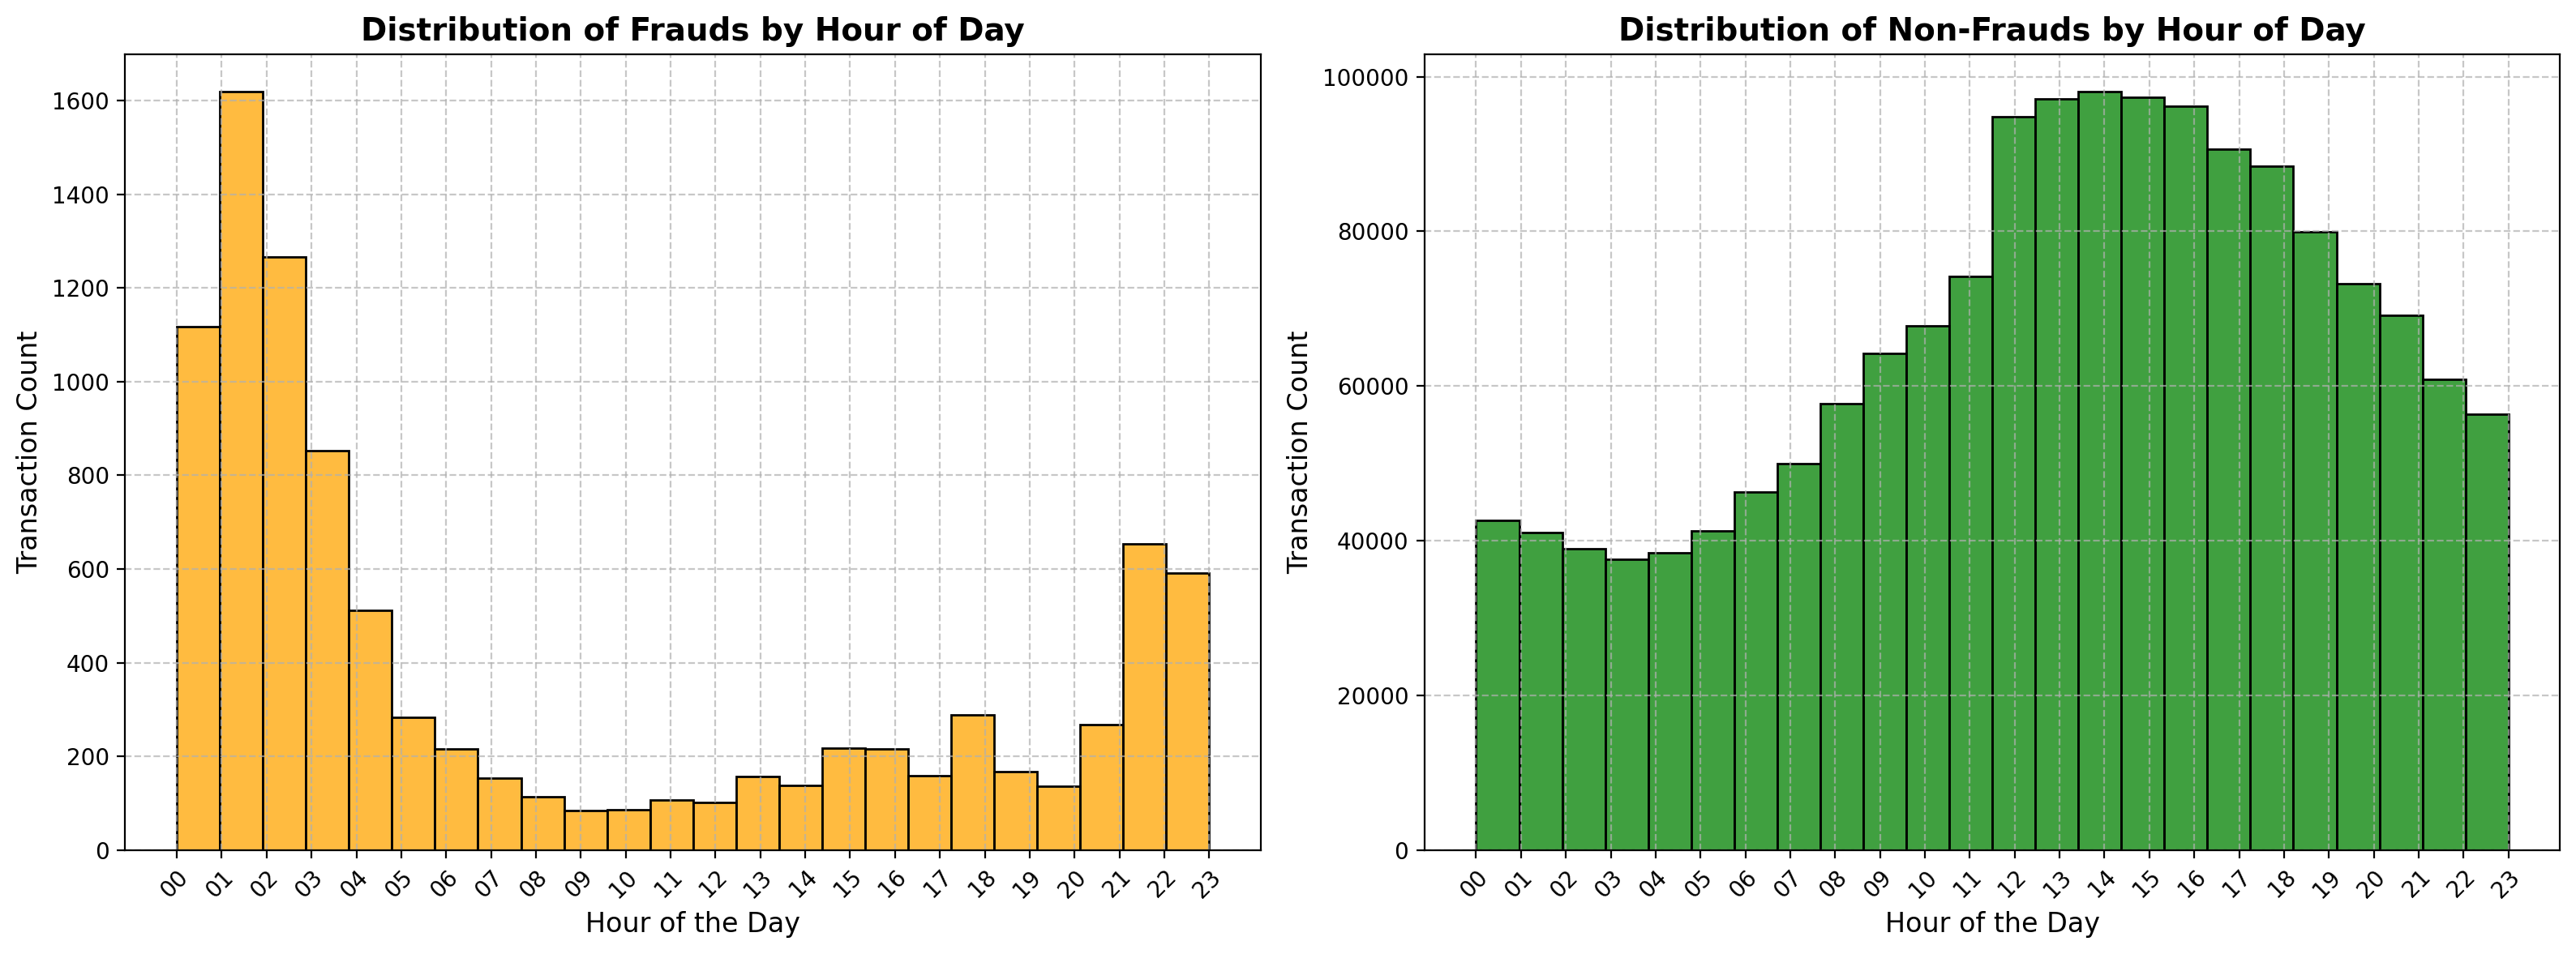

In [ ]:
# Create new columns for the hour in fraud and non-fraud dataframes
fraud_df['hour'] = fraud_df['transactionDateTime'].dt.hour
nonfraud_df['hour'] = nonfraud_df['transactionDateTime'].dt.hour

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Distribution of Frauds by Hour
sns.histplot(fraud_df['hour'], bins=24, edgecolor='black', color='orange', ax=axes[0])
axes[0].set_title('Distribution of Frauds by Hour of Day', fontsize=14, weight='bold')
axes[0].set_xlabel('Hour of the Day', fontsize=12)
axes[0].set_ylabel('Transaction Count', fontsize=12)

# Set x-ticks to the center of each hour
axes[0].set_xticks(np.arange(24))  # Set ticks at integer hours
axes[0].set_xticklabels([f'{int(hour):02}' for hour in np.arange(24)], rotation=45, ha='right', rotation_mode='anchor')


# Plot 2: Distribution of Non-Frauds by Hour
sns.histplot(nonfraud_df['hour'], bins=24, edgecolor='black', color='green', ax=axes[1])
axes[1].set_title('Distribution of Non-Frauds by Hour of Day', fontsize=14, weight='bold')
axes[1].set_xlabel('Hour of the Day', fontsize=12)
axes[1].set_ylabel('Transaction Count', fontsize=12)
axes[1].set_xticks(np.arange(24))
axes[1].set_xticklabels([f'{hour:02}' for hour in np.arange(24)], rotation=45, ha='right', rotation_mode='anchor')

# Add gridlines for both plots
for ax in axes:
    ax.grid(visible=True, linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()
plt.show()

These histograms show two different distributions for frauds and nonfrauds versus Hour of Day. This is great news! We can leverage this difference in our fraud detection straategies.

## 2. Card Present vs. Card Not Present

> Add blockquote



- **Card-Present (CP) transactions:** These occur when the physical card is used, such as at a point of sale (POS) terminal. They typically involve additional security measures like chip-and-PIN or contactless authentication, making them generally less susceptible to certain types of fraud.

- **Card-Not-Present (CNP) transactions:** As the name suggests, these occur when the card is not physically present, such as online purchases or over-the-phone transactions. CNP transactions are more prone to fraud because they lack the physical security features of CP transactions.

Distinguishing between CP and CNP transactions is crucial for fraud detection due to the significant differences in the nature, risk, and patterns of these transactions. We use the *category* column to separate CP/CNP in our dataset:
* 'categories' that end with *net* are considered CNP and the rest are classified as CP.
*  Let's get a breakdown of categories for frauds and non-frauds using **value_counts()** function.

Frauds: category
shopping_net      2052
grocery_pos       1905
misc_net          1091
shopping_pos      1058
gas_transport      681
kids_pets          454
misc_pos           382
personal_care      359
entertainment      302
home               288
grocery_net        260
food_dining        247
health_fitness     225
travel             195
Name: count, dtype: int64

NonFrauds: category
gas_transport     161670
home              151222
grocery_pos       150447
shopping_pos      143874
kids_pets         139754
shopping_net      119748
entertainment     115736
food_dining       114514
personal_care     113434
health_fitness    106346
misc_pos           99365
misc_net           78515
grocery_net        57371
travel             49985
Name: count, dtype: int64


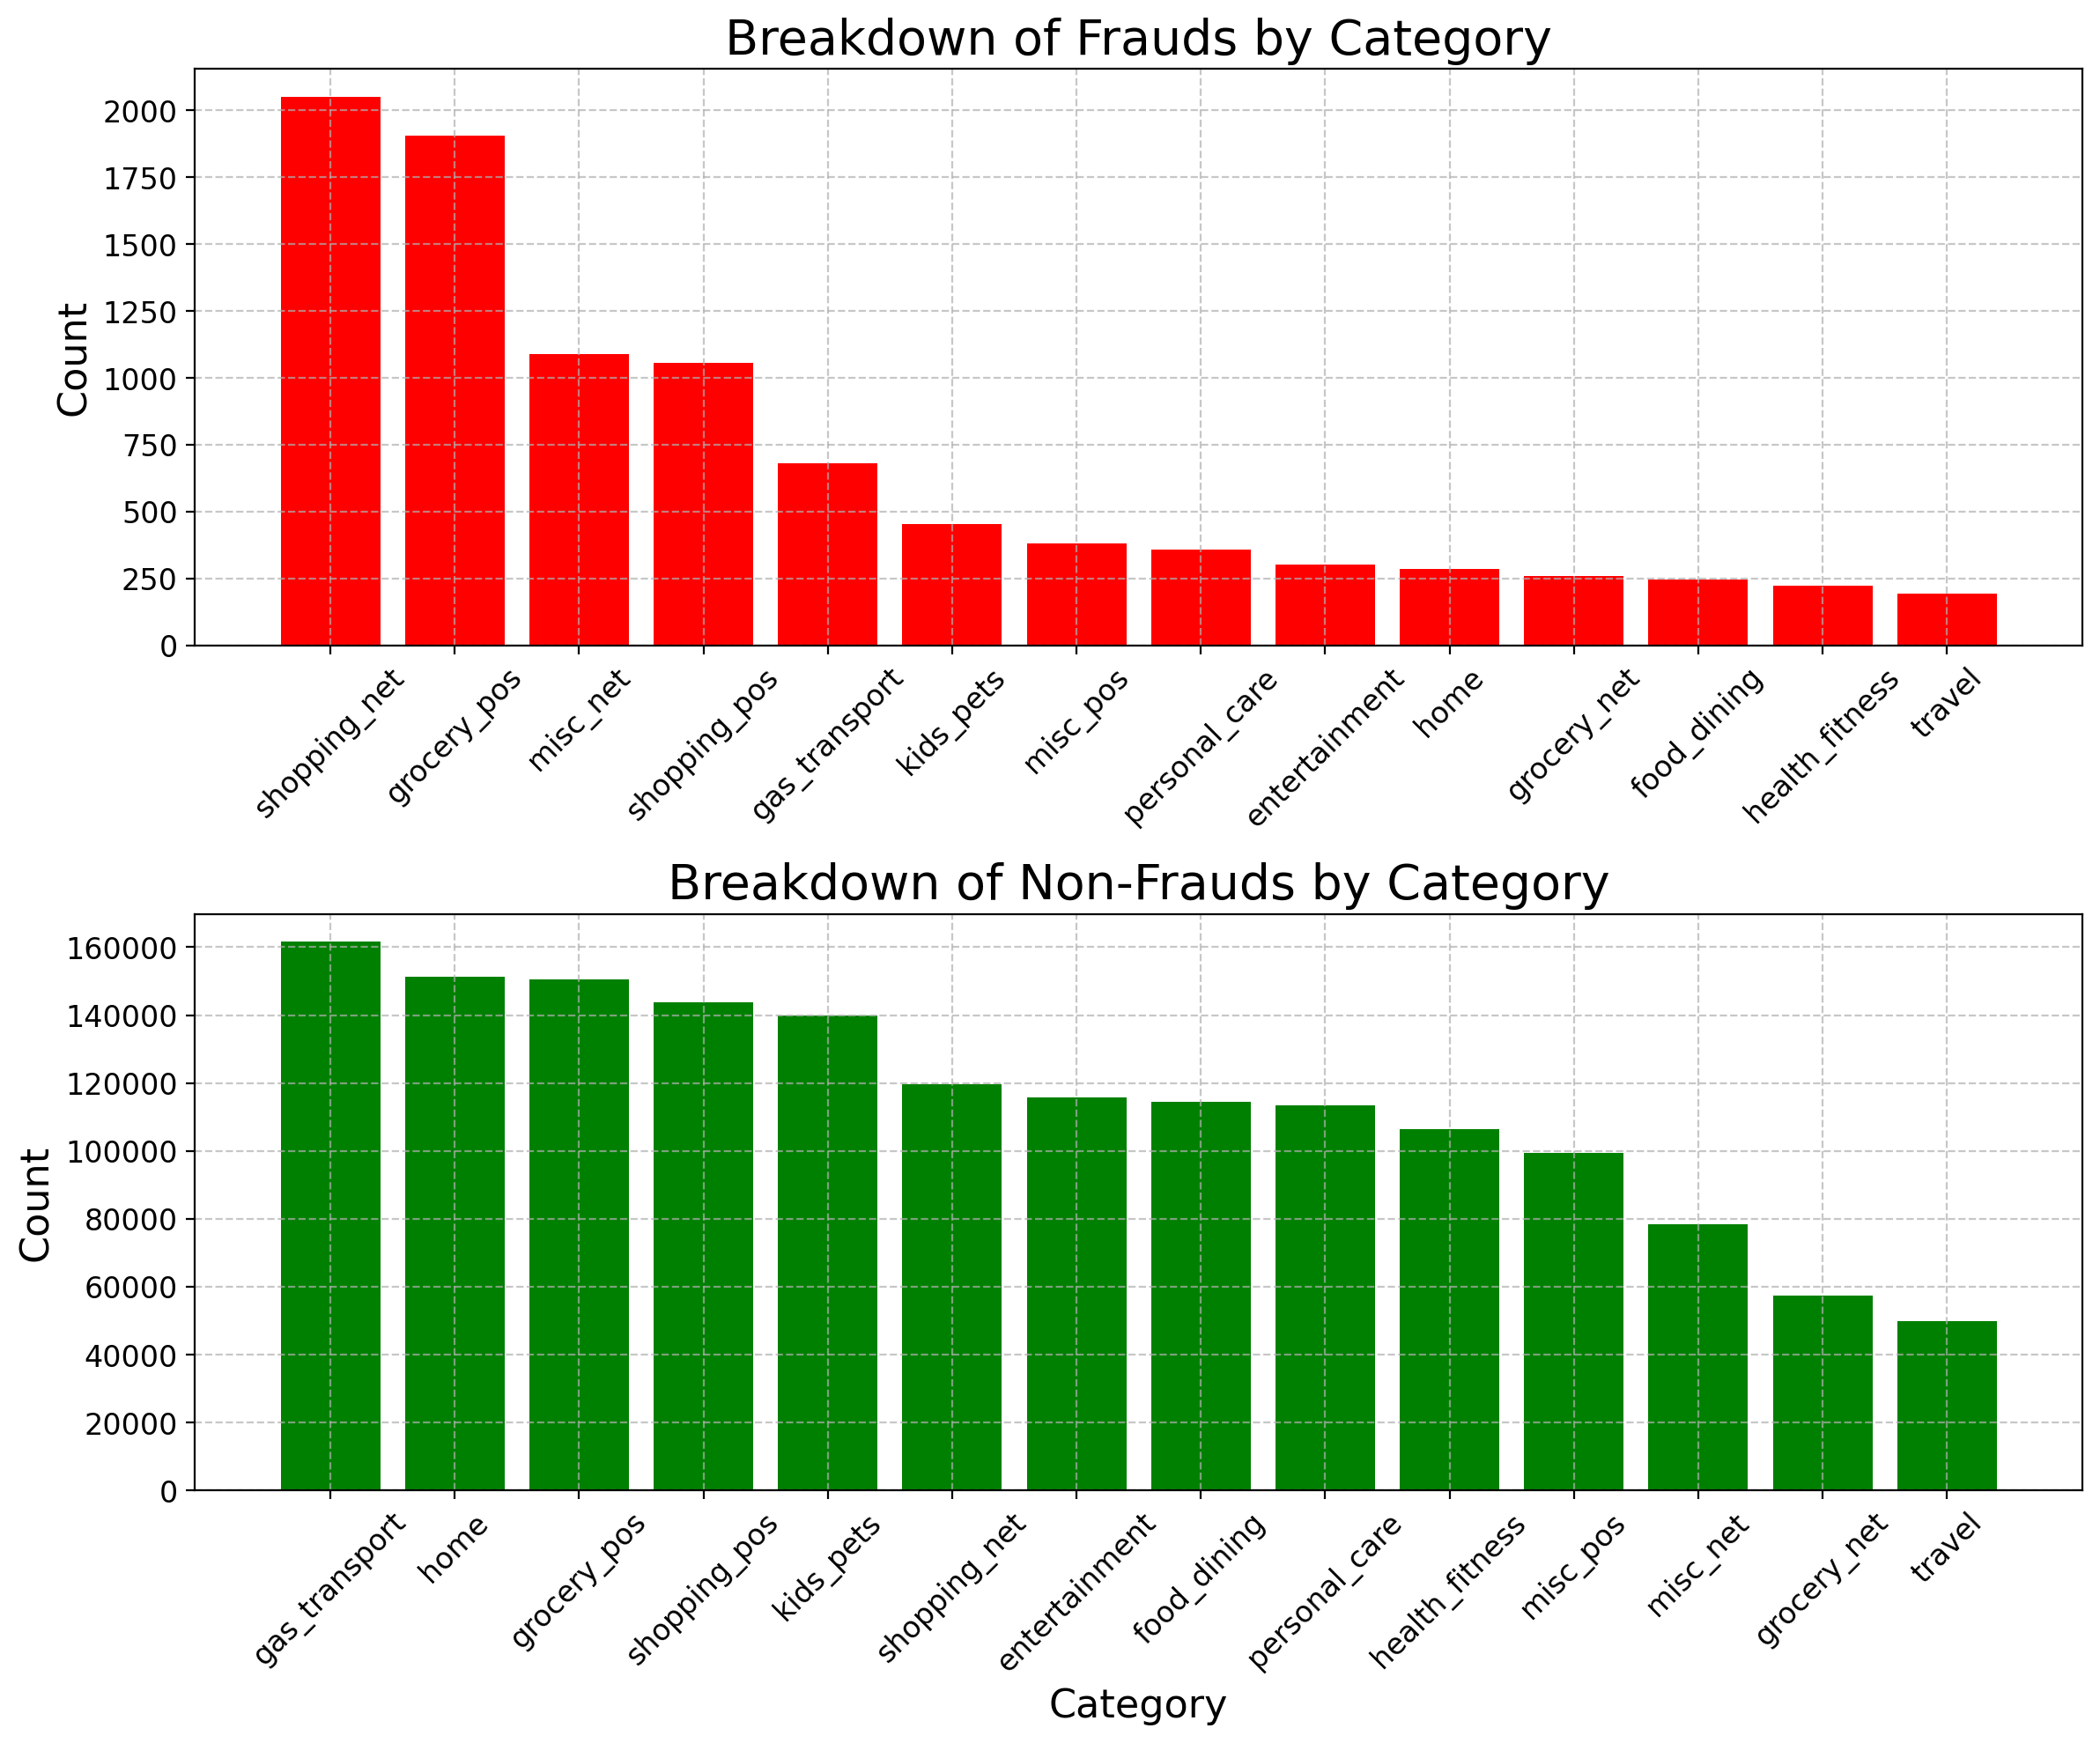

In [ ]:
# Create the figure with appropriate size and resolution
plt.figure(figsize=(12, 10), dpi=100)  # Set a reasonable size and high resolution

# Plot 1: Counting categories for frauds
plt.subplot(2, 1, 1)  # 2 rows, 1 column, subplot 1
fraud_counts_per_category = fraud_df['category'].value_counts()
print('Frauds:', fraud_counts_per_category)  # Uncomment to see actual numbers per category

plt.bar(fraud_counts_per_category.index, fraud_counts_per_category.values, color='red')
plt.title('Breakdown of Frauds by Category', fontsize=20)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize=12, rotation=45)  # Slightly larger font size for better readability
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)  # A grid with dashed lines to improve readability

# Plot 2: Counting categories for non-frauds
plt.subplot(2, 1, 2)  # 2 rows, 1 column, subplot 2
nonfraud_counts_per_category = nonfraud_df['category'].value_counts()
print('\nNonFrauds:', nonfraud_counts_per_category)  # Uncomment to see actual numbers per category

plt.bar(nonfraud_counts_per_category.index, nonfraud_counts_per_category.values, color='green')
plt.title('Breakdown of Non-Frauds by Category', fontsize=20)
plt.xlabel('Category', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize=12, rotation=45)  # Slightly larger font size for better readability
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)  # A grid with dashed lines to improve readability

# Adjust layout to prevent overlap and ensure clarity
plt.tight_layout()
plt.show()

Now, let's group them into CP and CNP using "net":

CNP Total = 259037
CP Total = 1352443
Overall Total = 1611480


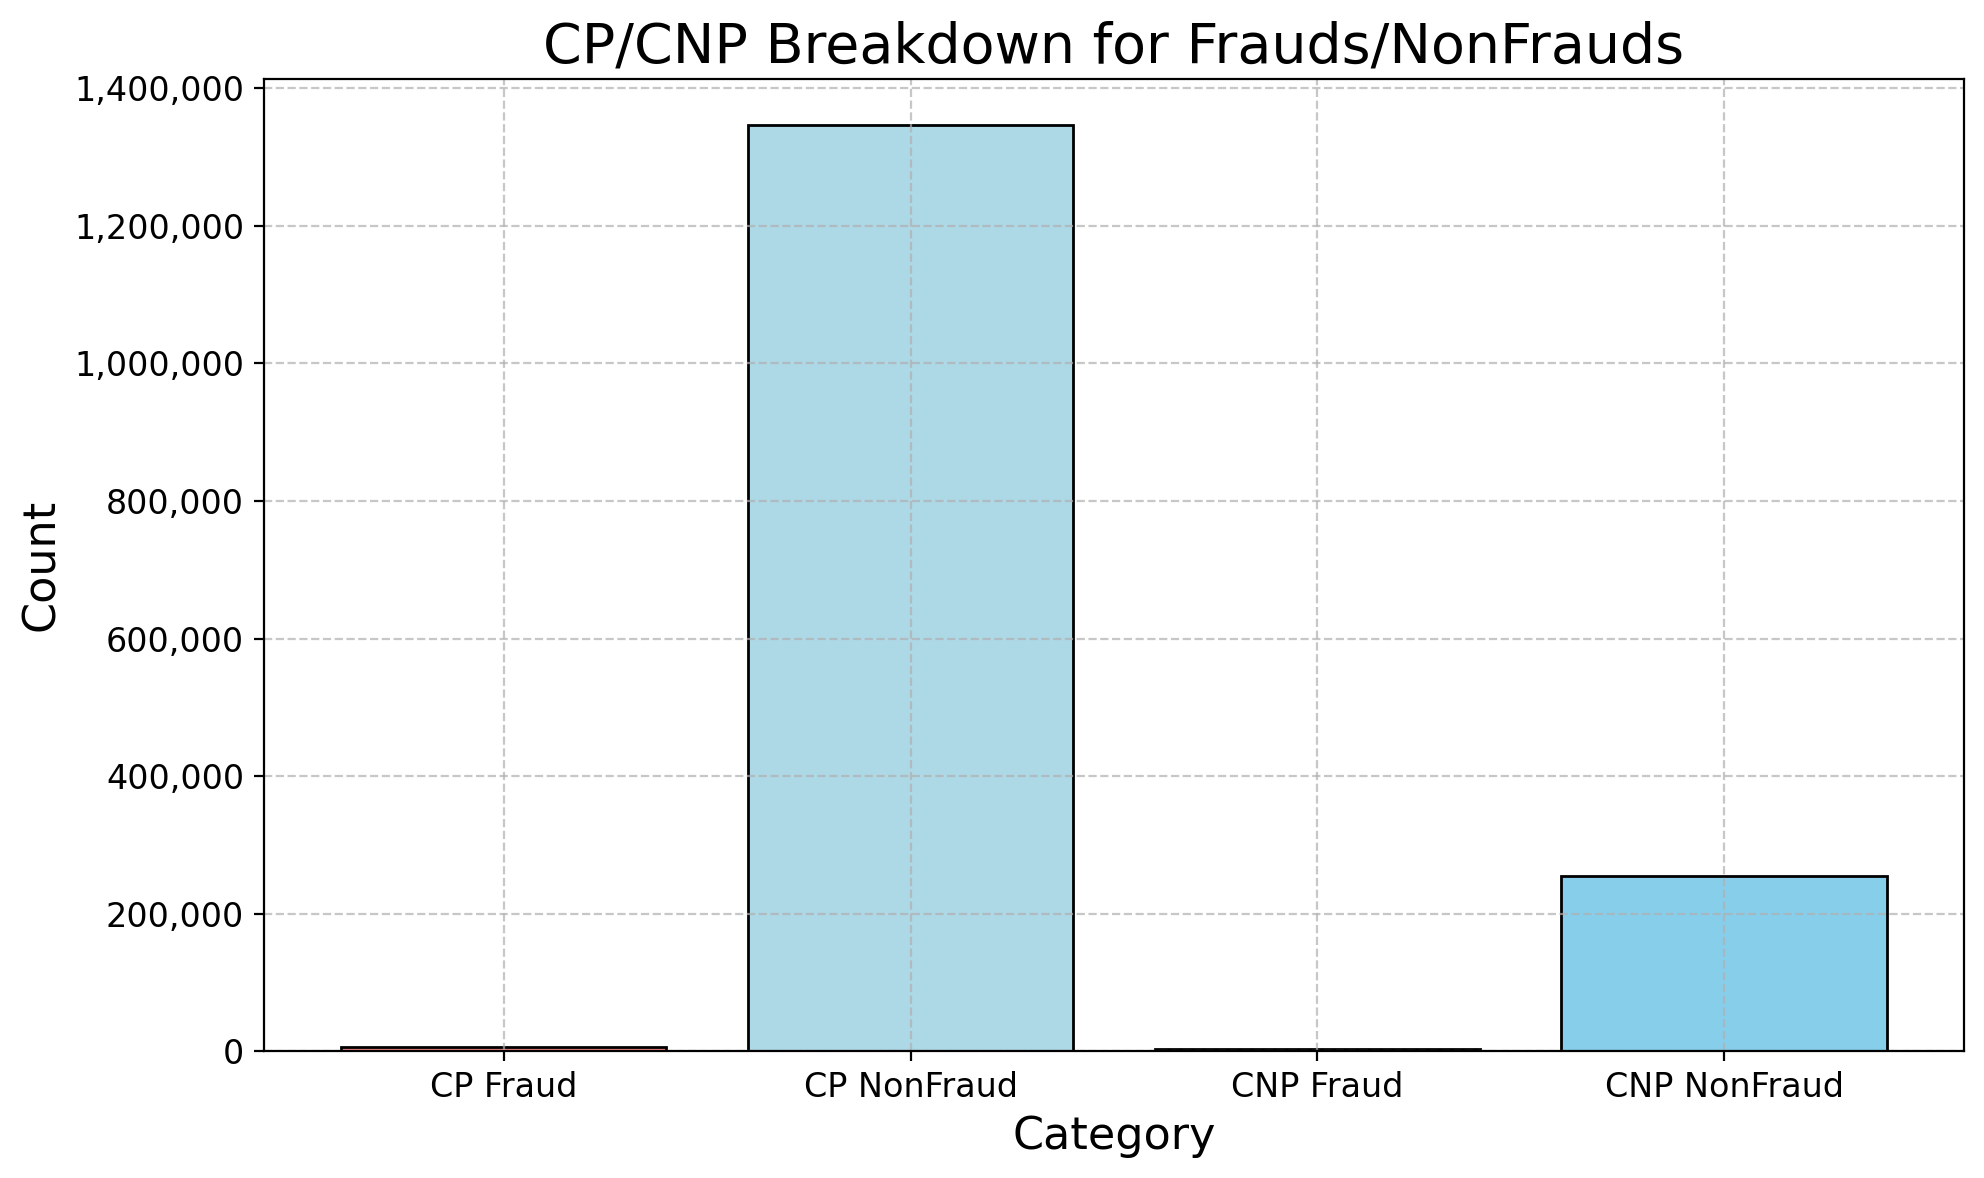

In [ ]:
# Calculate CP/CNP frauds
cnp_categories = ['shopping_net', 'grocery_net', 'misc_net']
cnp_fraud = sum(fraud_counts_per_category.get(category, 0) for category in cnp_categories)
cp_fraud = fraud_counts_per_category.sum() - cnp_fraud

# Calculate CP/CNP non-frauds
cnp_nonfraud = sum(nonfraud_counts_per_category.get(category, 0) for category in cnp_categories)
cp_nonfraud = nonfraud_counts_per_category.sum() - cnp_nonfraud

# Create barplot data
x = ['CP Fraud', 'CP NonFraud', 'CNP Fraud', 'CNP NonFraud']
y = [cp_fraud, cp_nonfraud, cnp_fraud, cnp_nonfraud]

# Define colors for the bars
colors = ['lightcoral', 'lightblue', 'salmon', 'skyblue']

# Create the bar plot
plt.figure(figsize=(10, 6), dpi=100)
plt.bar(x, y, color=colors, edgecolor='black')

# Format y-axis to avoid scientific notation
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.grid(True, linestyle='--', alpha=0.7)  # Add grid with dashed lines for better readability
plt.title('CP/CNP Breakdown for Frauds/NonFrauds', fontsize=20)
plt.xlabel('Category', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Print statistics
total_cnp = cnp_fraud + cnp_nonfraud
total_cp = cp_fraud + cp_nonfraud
total_all = total_cnp + total_cp

print(f"CNP Total = {total_cnp}")
print(f"CP Total = {total_cp}")
print(f"Overall Total = {total_all}")

plt.tight_layout()
plt.show()

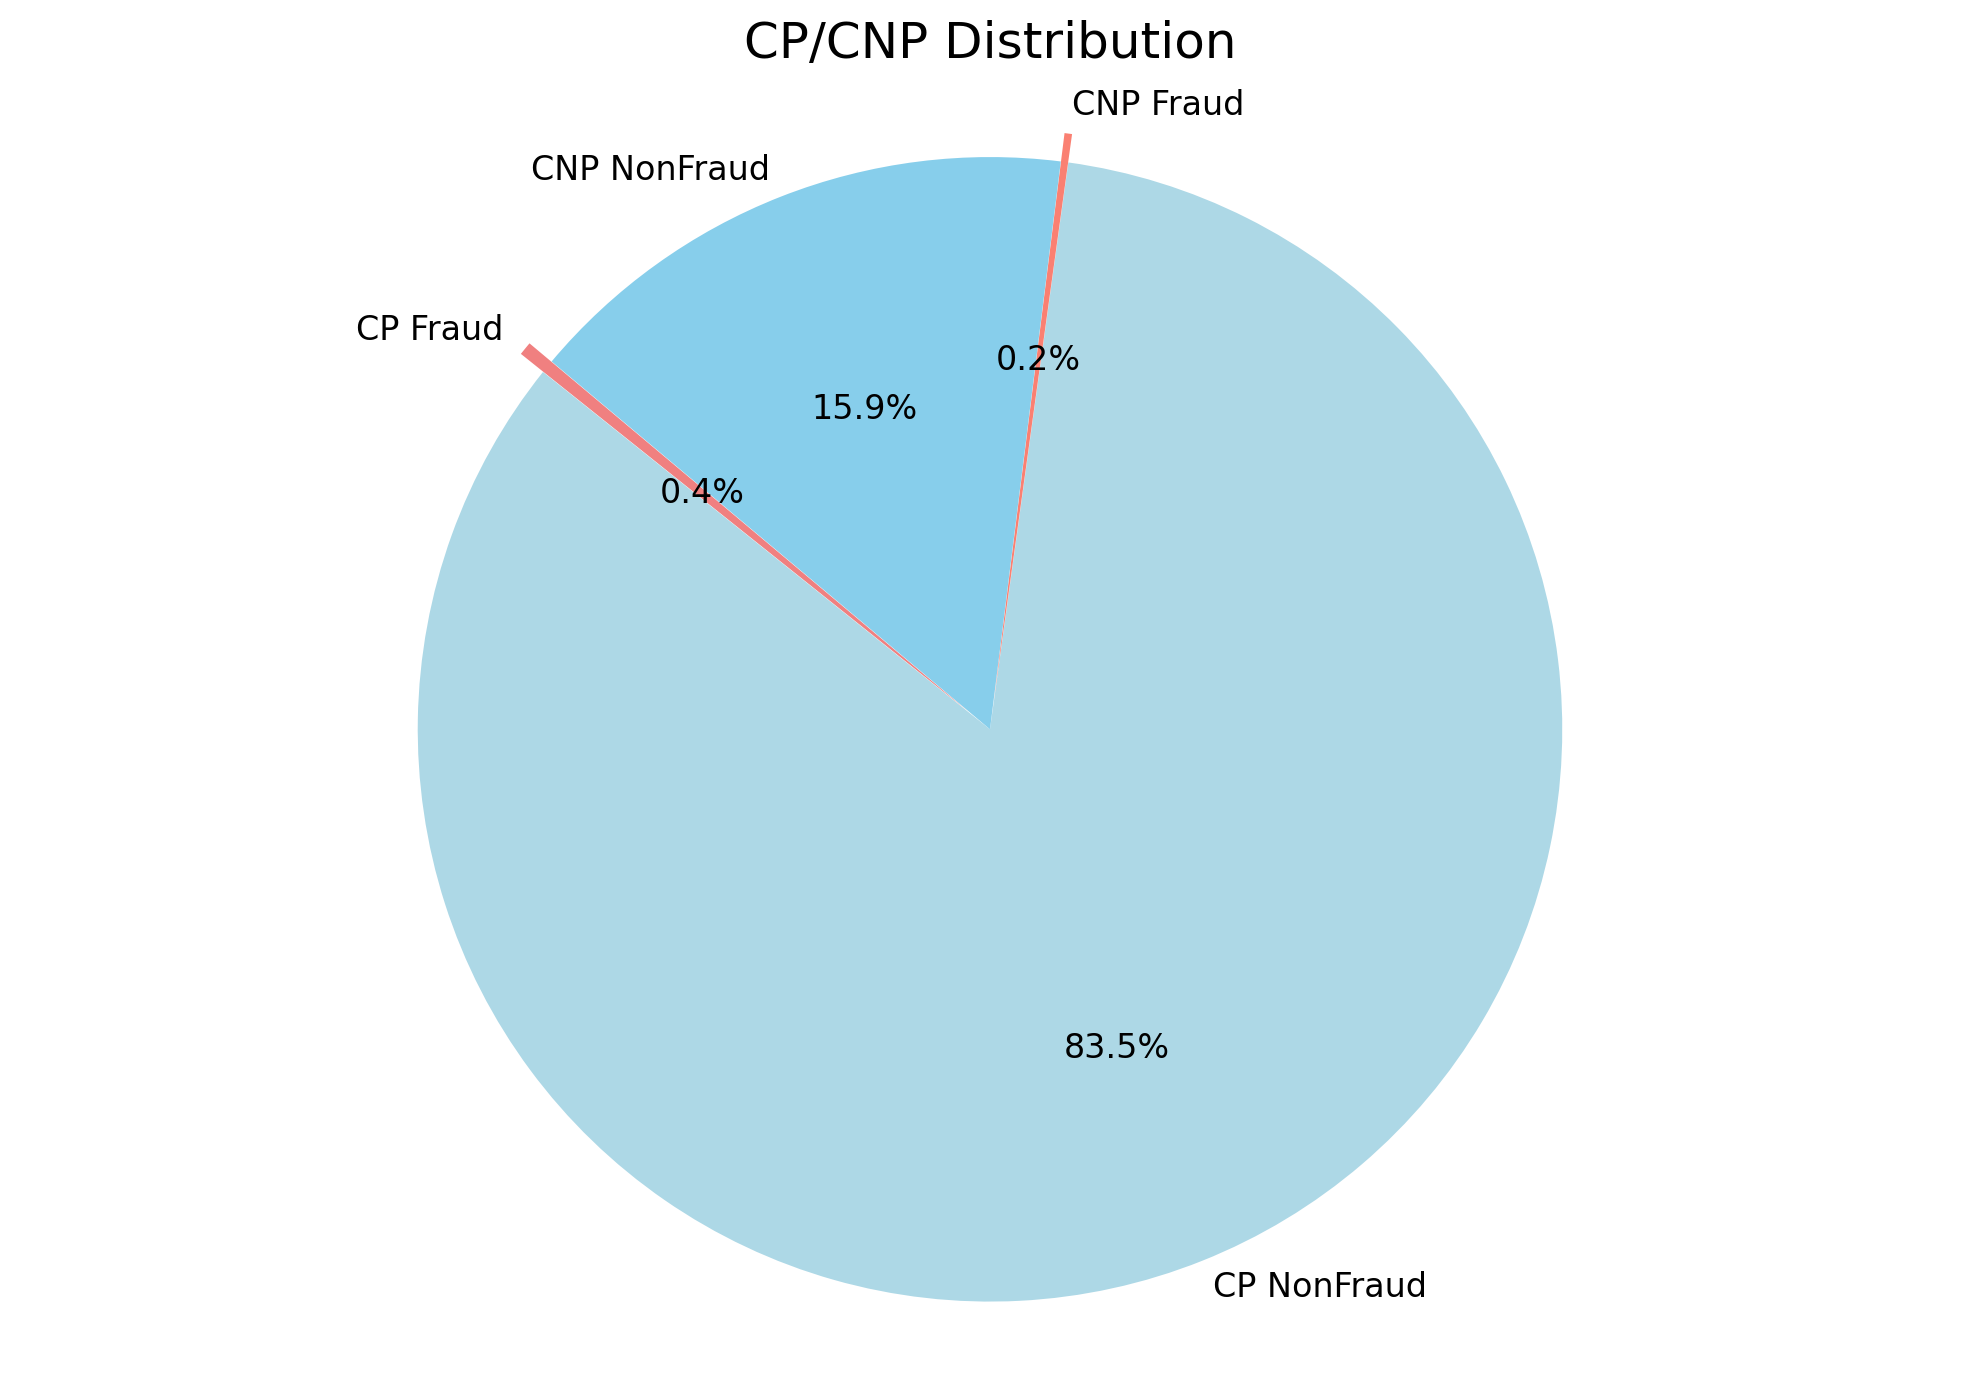

In [ ]:
# Define the data for the pie chart
x = ['CP Fraud', 'CP NonFraud', 'CNP Fraud', 'CNP NonFraud']
y = [cp_fraud, cp_nonfraud, cnp_fraud, cnp_nonfraud]

# Create the pie chart
plt.figure(figsize=(10, 7))
explode = (0.05, 0, 0.05, 0)  # "explode" the first and third slices
plt.pie(y, labels=x, autopct='%1.1f%%', startangle=140,
        textprops={'fontsize': 12},  # Increased font size
        colors=['lightcoral', 'lightblue', 'salmon', 'skyblue'],
        explode=explode,  # Explode specified slices
        # shadow=True,  # Add shadow for better visibility
        labeldistance=1.05)  # Closer labels to the pie chart

# Title and layout adjustments
plt.title('CP/CNP Distribution', fontsize=18)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.tight_layout()
plt.show()

A key statistic from this analysis is the frauds rate within the CP and CNP subpopulations. This insight will be valuable during the later stages of model development.

In [ ]:
# fraud rate calculation
fr_cnp = cnp_fraud / (cnp_fraud + cnp_nonfraud)  # CNP
fr_cp = cp_fraud / (cp_fraud + cp_nonfraud)  # CP

print("Fraud Rate Calculations:")
print(f"CNP Fraud Rate = CNP fraud ÷ (CNP fraud + CNP nonfraud) = {cnp_fraud} ÷ ({cnp_fraud} + {cnp_nonfraud}) = {fr_cnp:.4f}")
print(f"CP Fraud Rate = CP fraud ÷ (CP fraud + CP nonfraud) = {cp_fraud} ÷ ({cp_fraud} + {cp_nonfraud}) = {fr_cp:.4f}")

Fraud Rate Calculations:
CNP Fraud Rate = CNP fraud ÷ (CNP fraud + CNP nonfraud) = 3403 ÷ (3403 + 255634) = 0.0131
CP Fraud Rate = CP fraud ÷ (CP fraud + CP nonfraud) = 6096 ÷ (6096 + 1346347) = 0.0045


So, we observe that the fraud rate is higher for the CNP subpopulation. This aligns with our initial assumption that CNP transactions, lacking certain security measures, are more susceptible to fraud. Therefore, we can utilize this feature (indicating whether a transaction is CP or CNP) to emphasize if a transaction is CNP. This can help us capture more of the CNP frauds and we know:

In [ ]:
print(f"We have {cnp_fraud} CNP frauds which is {100*cnp_fraud/(cnp_fraud+cp_fraud):.2f}% of total frauds")

We have 3403 CNP frauds which is 35.82% of total frauds


## 3. Cross-border vs Domestic
- **Cross-border transactions:** These tend to have higher fraud risk due to less stringent security measures, differences in regulatory environments, and the complexity of international verification.

- **Domestic transactions:** These generally have lower fraud risk as banks and payment processors can more easily verify the authenticity of the transaction within the same country.

We distinguish domestic transactions from cross-border transactions using the cardholderCountry and merchCountry fields. If the cardholderCountry and merchCountry match for a given transaction, it is classified as a domestic transaction. Otherwise, it is classified as a cross-border transaction.
Let's create a column called "is_international" to differentiate between cross-border and domestic transactions. This column will have binary values: 1 for cross-border and 0 for domestic.

In [ ]:
# define a function to assign 0 to domestic transactions and 1 to cross-border
df['is_international'] = (df['cardholderCountry'] != df['merchCountry']).astype(int) # defining cross-border
fraud_df['is_international'] = (fraud_df['cardholderCountry'] != fraud_df['merchCountry']).astype(int)
nonfraud_df['is_international'] = (nonfraud_df['cardholderCountry'] != nonfraud_df['merchCountry']).astype(int)

fraud_df.head()

,pan,merchant,category,transactionAmount,first,last,gender,street,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,mdlIsFraudTrx,mdlIsFraudAcct,transactionDateTime,is_train,merchCountry,merchState,cardholderCountry,cardholderState,hour,is_international
0,T001028354037962B,Zboncak LLC,grocery_pos,1338.57,Melody,Thompson,F,0362 Anderson Wall,64470,40.1362,-95.2138,1631,Architect,1953-01-20,6f65ed65d3f36366420fc82e4f0a499a,1345224472,40.199545,-95.393991,1,1,2020-09-17 15:27:52,1,US,Missouri,US,Missouri,15,0
1,T001028354037962B,Zboncak LLC,shopping_pos,1189.84,Melody,Thompson,F,0362 Anderson Wall,64470,40.1362,-95.2138,1631,Architect,1953-01-20,6f65ed65d3f36366420fc82e4f0a499a,1345224472,40.199545,-95.393991,1,1,2020-09-17 15:41:52,1,US,Missouri,US,Missouri,15,0
2,T001028354037962B,Zboncak LLC,misc_pos,743.65,Melody,Thompson,F,0362 Anderson Wall,64470,40.1362,-95.2138,1631,Architect,1953-01-20,6f65ed65d3f36366420fc82e4f0a499a,1345224472,40.199545,-95.393991,1,1,2020-09-17 15:55:52,1,US,Missouri,US,Missouri,15,0
3,T001028354037962B,Zboncak LLC,grocery_pos,1338.57,Melody,Thompson,F,0362 Anderson Wall,64470,40.1362,-95.2138,1631,Architect,1953-01-20,6f65ed65d3f36366420fc82e4f0a499a,1345224472,40.199545,-95.393991,1,1,2020-09-17 16:09:52,1,US,Missouri,US,Missouri,16,0
4,T001028354037962B,Zboncak LLC,food_dining,1189.84,Melody,Thompson,F,0362 Anderson Wall,64470,40.1362,-95.2138,1631,Architect,1953-01-20,6f65ed65d3f36366420fc82e4f0a499a,1345224472,40.199545,-95.393991,1,1,2020-09-17 16:23:52,1,US,Missouri,US,Missouri,16,0


This is where we stop for this week!
Please note that we added two columns in this week in "time" and "is_international". We will need the is_international column in the next weeks as well, so let's drop the "time" column and then save our dataframe for the following weeks.

## Exercises & Challenges
#### Exercise  
1.	Create histograms that show the counts by merchCountry for frauds and non-frauds (hint: use value_counts() function)
*	Calculate fraud rates for each merchCountry.
2. Analyze cross-border vs. domestic transactions.
*	Use a pie plot to visualize the fraud/non-fraud counts within each sub-population (cross-border vs. domestic).
*	Calculate transaction-level fraud rates in cross-border and domestic sub-populations.
*	Analyze and explain the differences in fraud rates.
#### Challenge: Explore Additional Predictive Features
*	Examine the existing data fields and brainstorm other features or subpopulations that could be predictive of fraud.

In [ ]:
fraud_country_counts = fraud_df['merchCountry'].value_counts()
nonfraud_country_counts = nonfraud_df['merchCountry'].value_counts()

print("Fraud Dataframe merchCountry Counts ")
print(fraud_country_counts)
print("\nNonFraud Dataframe merchCountry Counts ")
print(nonfraud_country_counts)
country_counts_df = fraud_country_counts / (fraud_country_counts + nonfraud_country_counts)
print(country_counts_df)

Fraud Dataframe merchCountry Counts 
merchCountry
US    8768
CA     577
MX     118
CU      21
BS      15
Name: count, dtype: int64

NonFraud Dataframe merchCountry Counts 
merchCountry
US    1524755
CA      62991
MX      11653
CU       1642
BS        940
Name: count, dtype: int64
merchCountry
US    0.005718
CA    0.009077
MX    0.010025
CU    0.012628
BS    0.015707
Name: count, dtype: float64


Frauds: merchCountry
US    8768
CA     577
MX     118
CU      21
BS      15
Name: count, dtype: int64

NonFrauds: merchCountry
US    1524755
CA      62991
MX      11653
CU       1642
BS        940
Name: count, dtype: int64


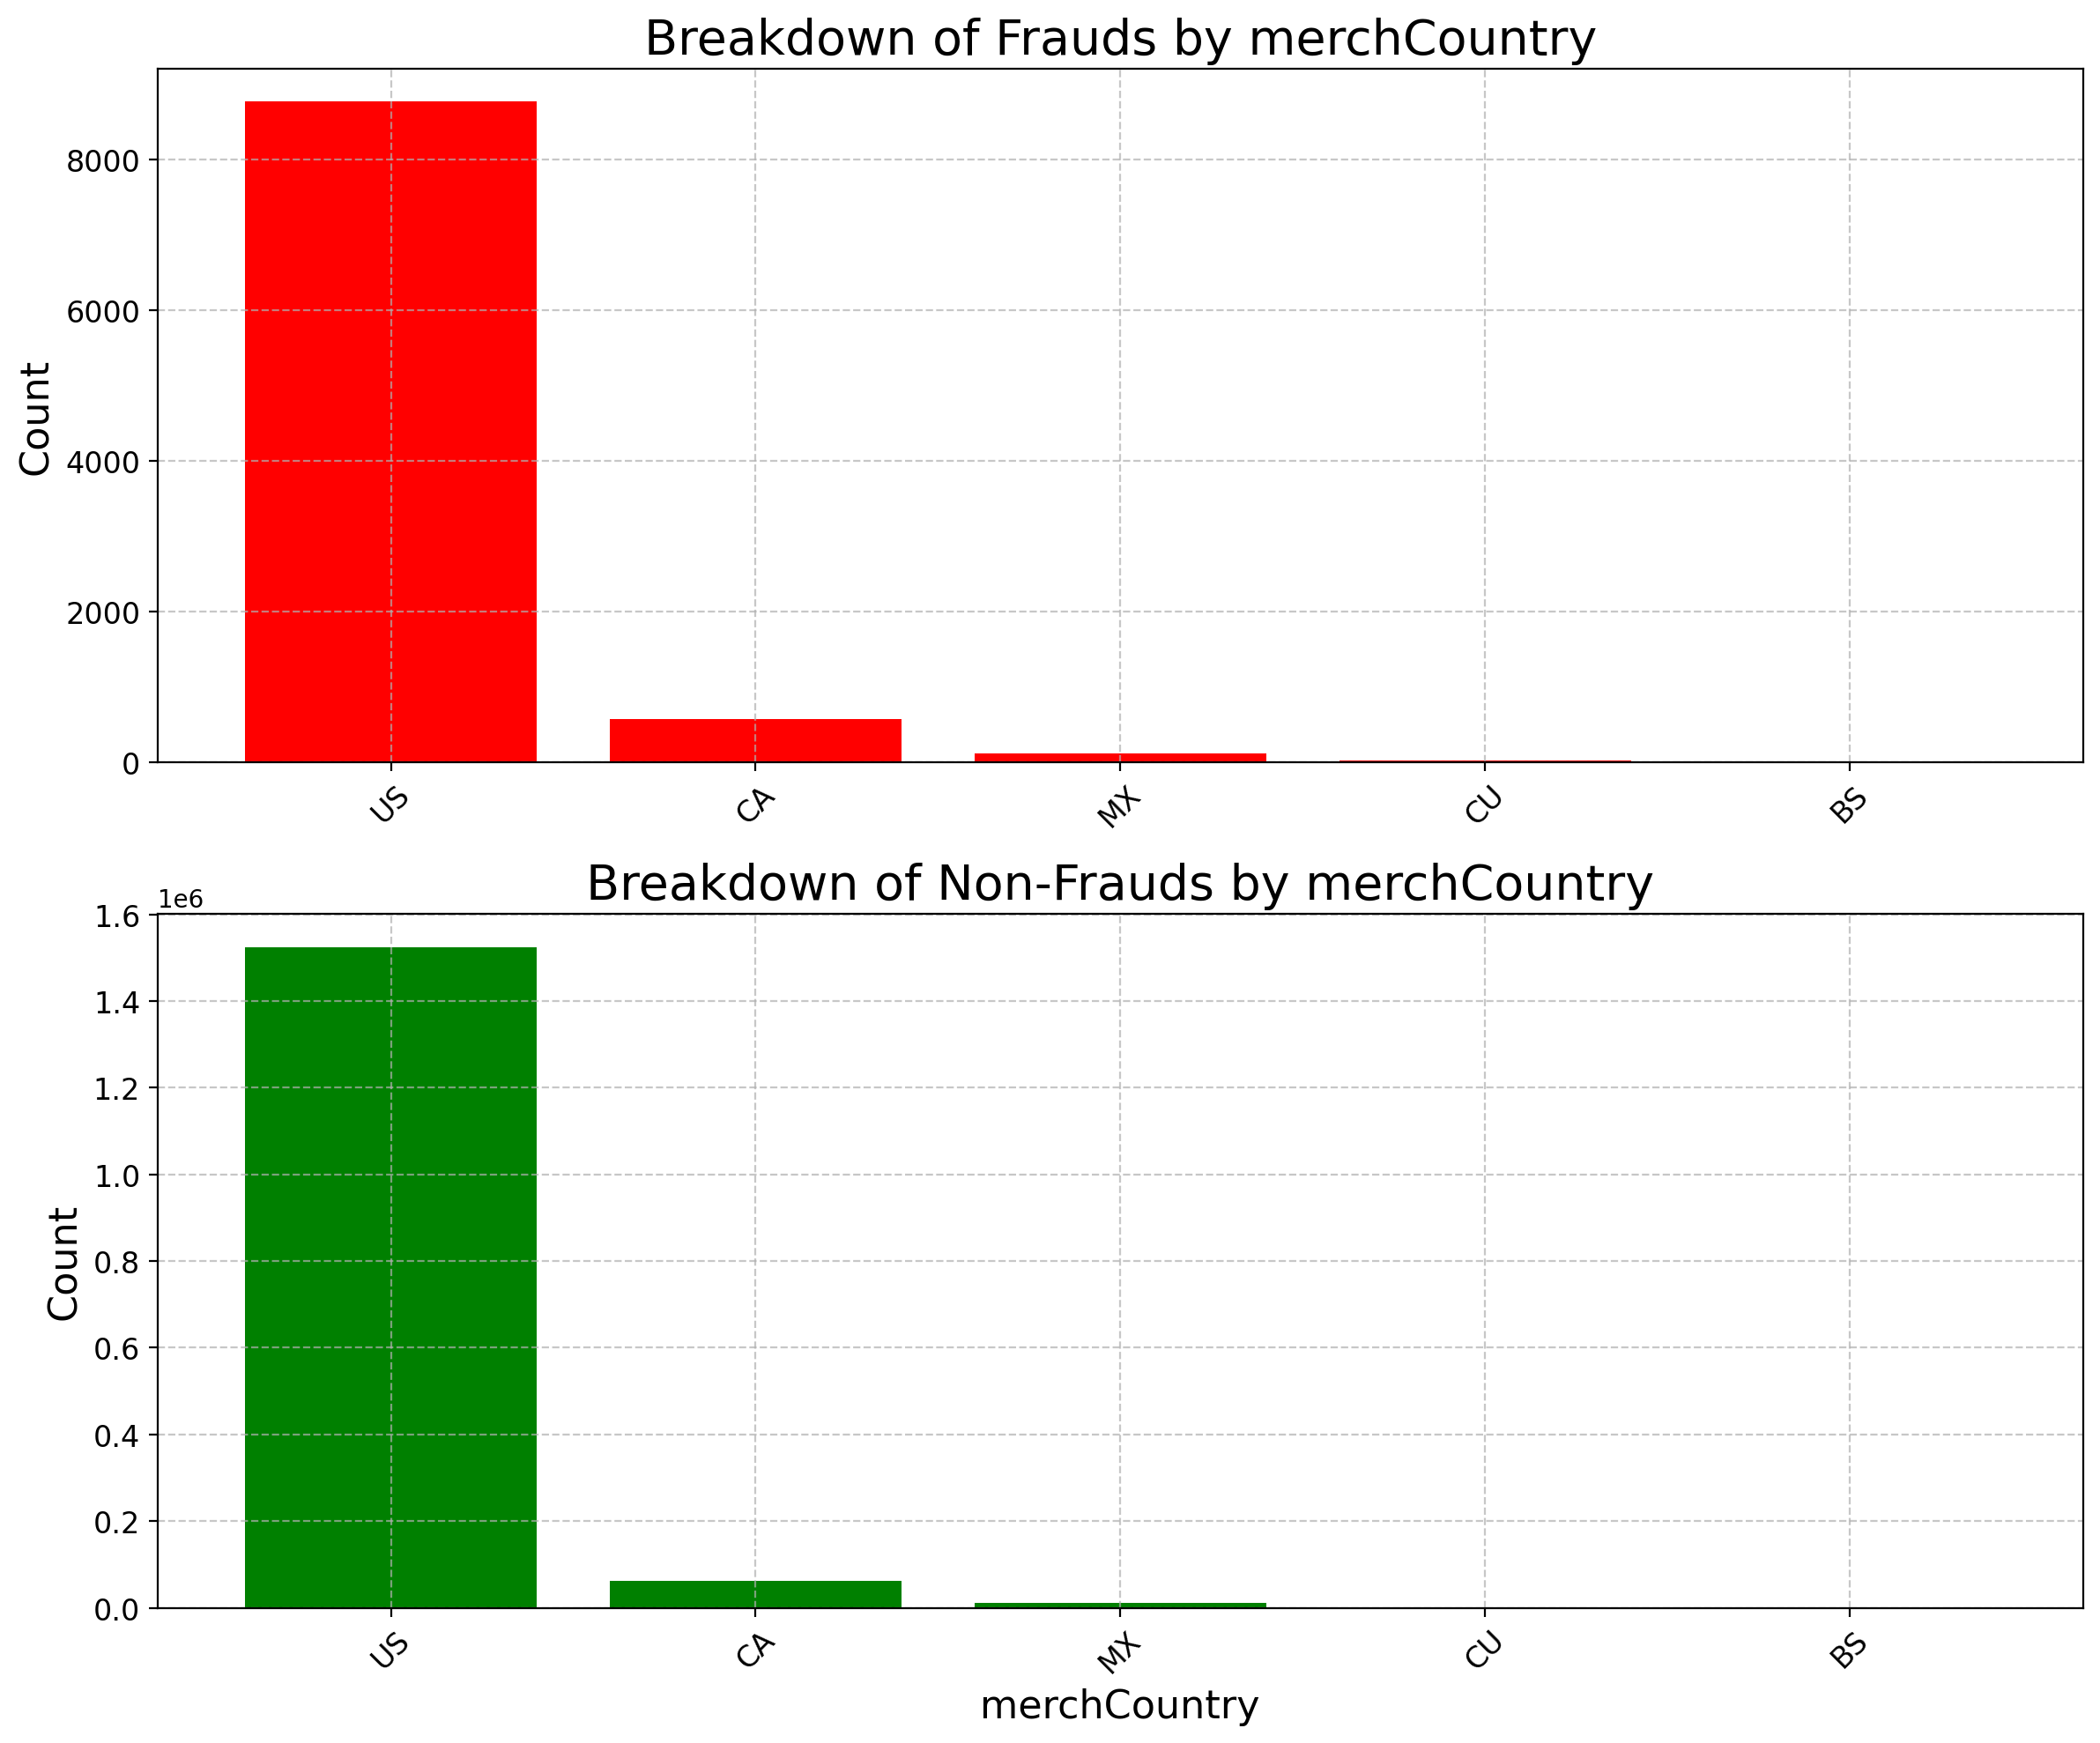

In [ ]:
# Create the figure with appropriate size and resolution
plt.figure(figsize=(12, 10), dpi=100)  # Set a reasonable size and high resolution

# Plot 1: Counting categories for frauds
plt.subplot(2, 1, 1)  # 2 rows, 1 column, subplot 1
fraud_counts_per_merchCountry = fraud_df['merchCountry'].value_counts()
print('Frauds:', fraud_counts_per_merchCountry)  # Uncomment to see actual numbers per merchCountry

plt.bar(fraud_counts_per_merchCountry.index, fraud_counts_per_merchCountry.values, color='red')
plt.title('Breakdown of Frauds by merchCountry', fontsize=20)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize=12, rotation=45)  # Slightly larger font size for better readability
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)  # A grid with dashed lines to improve readability

# Plot 2: Counting merchCountry for non-frauds
plt.subplot(2, 1, 2)  # 2 rows, 1 column, subplot 2
nonfraud_counts_per_merchCountry = nonfraud_df['merchCountry'].value_counts()
print('\nNonFrauds:', nonfraud_counts_per_merchCountry)  # Uncomment to see actual numbers per merchCountry

plt.bar(nonfraud_counts_per_merchCountry.index, nonfraud_counts_per_merchCountry.values, color='green')
plt.title('Breakdown of Non-Frauds by merchCountry', fontsize=20)
plt.xlabel('merchCountry', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize=12, rotation=45)  # Slightly larger font size for better readability
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)  # A grid with dashed lines to improve readability

# Adjust layout to prevent overlap and ensure clarity
plt.tight_layout()
plt.show()

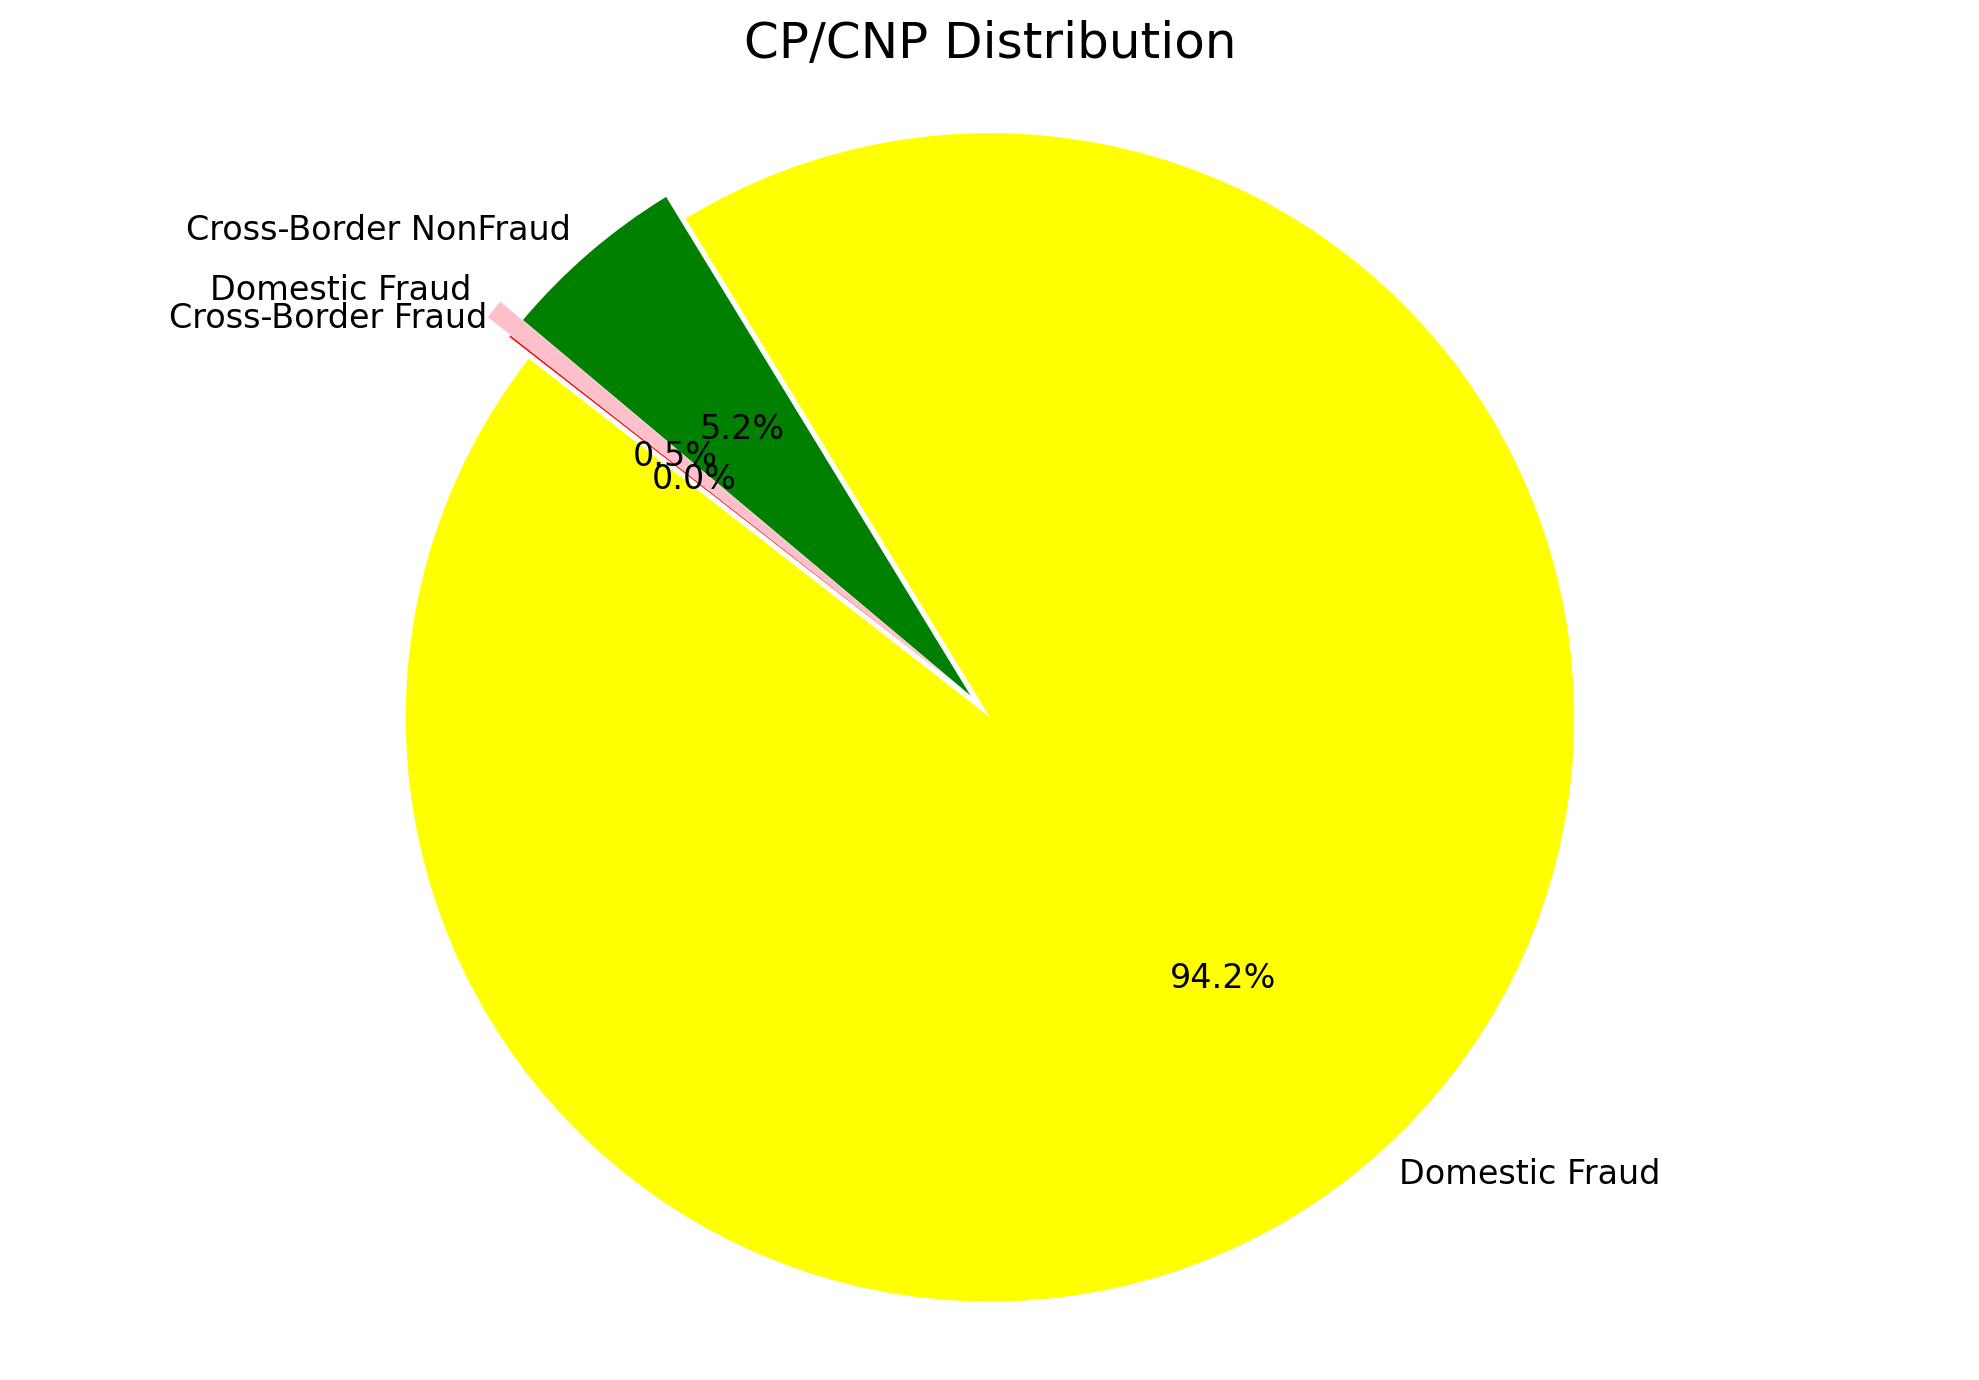

In [ ]:
# Define the data for the pie chart
xborder_fraud = len(fraud_df[fraud_df['is_international'] == 1])
domestic_fraud = len(fraud_df[fraud_df['is_international'] == 0])
xborder_nonfraud = len(nonfraud_df[nonfraud_df['is_international'] == 1])
domestic_nonfraud = len(nonfraud_df[nonfraud_df['is_international'] == 0])
x = ['Domestic Fraud', 'Cross-Border Fraud', 'Domestic Fraud', 'Cross-Border NonFraud']
y = [domestic_fraud, xborder_fraud, domestic_nonfraud, xborder_nonfraud]

# Create the pie chart
plt.figure(figsize=(10, 7))
explode = (0.05, 0, 0.05, 0)  # "explode" the first and third slices
plt.pie(y, labels=x, autopct='%1.1f%%', startangle=140,
        textprops={'fontsize': 12},  # Increased font size
        colors=['pink', 'red', 'yellow', 'green'],
        explode=explode,  # Explode specified slices
        # shadow=True,  # Add shadow for better visibility
        labeldistance=1.05)  # Closer labels to the pie chart

# Title and layout adjustments
plt.title('CP/CNP Distribution', fontsize=18)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.tight_layout()
plt.show()

In [ ]:
#Transaction level fraud rate calculation
tran_level_fr_domestic = domestic_fraud/(domestic_fraud + domestic_nonfraud)
tran_level_fr_xborder = xborder_fraud/(xborder_fraud + xborder_nonfraud)

print("Fraud Rate Calculations:")
print(f"Domestic transaction-level fraud rate = {domestic_fraud} ÷ ({domestic_fraud} + {domestic_nonfraud}) = {tran_level_fr_domestic:.4f}")
print(f"Cross-border transaction-level fraud rate = {xborder_fraud} ÷ ({xborder_fraud} + {xborder_nonfraud}) = {tran_level_fr_xborder:.4f}")

Fraud Rate Calculations:
Domestic transaction-level fraud rate = 8762 ÷ (8762 + 1518743) = 0.0057
Cross-border transaction-level fraud rate = 737 ÷ (737 + 83238) = 0.0088


In [ ]:
# Calculate fraud rates for cross-border and domestic transactions
cross_border_fraud_rate = fraud_df['is_international'].mean()
domestic_fraud_rate = 1 - cross_border_fraud_rate  # Since is_international is 0 for domestic

print("Fraud Rates:")
print(f"Cross-border: {cross_border_fraud_rate:.4f}")
print(f"Domestic: {domestic_fraud_rate:.4f}")

Fraud Rates:
Cross-border: 0.0776
Domestic: 0.9224
